In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('pima-indians-diabetes.csv')

# Display the first few rows of the dataset
print(data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


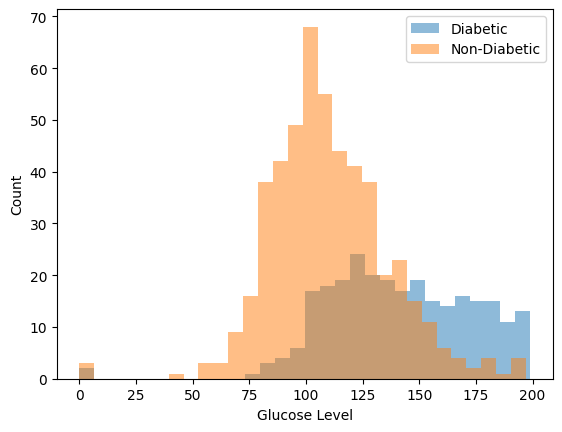

In [12]:
# Separate the data based on the target variable
diabetic = data[data['Outcome'] == 1]
non_diabetic = data[data['Outcome'] == 0]

# Plot the distribution of glucose levels
plt.hist(diabetic['Glucose'], bins=30, alpha=0.5, label='Diabetic')
plt.hist(non_diabetic['Glucose'], bins=30, alpha=0.5, label='Non-Diabetic')
plt.xlabel('Glucose Level')
plt.ylabel('Count')
plt.legend()
plt.show()


In [13]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
class MPNeuron:
    def __init__(self):
        self.b = None

    def model(self, x):
        return int(sum(x) >= self.b)

    def predict(self, X):
        y_pred = []
        for x in X:
            y_pred.append(self.model(x))
        return y_pred

    def fit(self, X, y):
        accuracy = {}
        for b in range(X.shape[1] + 1):
            self.b = b
            y_pred = self.predict(X)
            accuracy[b] = sum(y_pred == y) / len(y)
        best_b = max(accuracy, key=accuracy.get)
        self.b = best_b
        print("Best value of b:", best_b)
        print("Accuracy:", accuracy[best_b])


In [16]:
from sklearn.linear_model import Perceptron

class PerceptronModel:
    def __init__(self):
        self.perceptron = Perceptron()

    def fit(self, X, y):
        self.perceptron.fit(X, y)

    def predict(self, X):
        return self.perceptron.predict(X)

    def score(self, X, y):
        return self.perceptron.score(X, y)


In [17]:
# Create and train the Perceptron model
perceptron_model = PerceptronModel()
perceptron_model.fit(X_train, y_train)

# Test the model on the testing set
accuracy_perceptron = perceptron_model.score(X_test, y_test)
print("Perceptron Accuracy:", accuracy_perceptron)


Perceptron Accuracy: 0.5714285714285714
